# Module 2 - Image transformations and filters - Part 2: Gradients and Edge Detection

## 2.4 Image Gradients

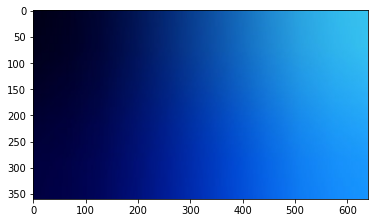

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/gradient.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Show image
plt.imshow(img)
plt.show()

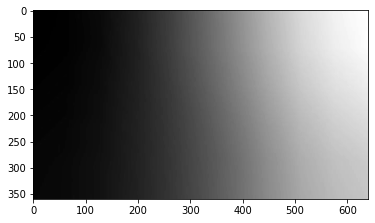

In [3]:
# Convert image to gray scale
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Show image
plt.imshow(gray, cmap='gray')
plt.show()
